1. Use iris dataset and perform the following: 

a) Implement Pre-processing functions 

- check for NULL values in the dataset. If any NULL value is present then treat it  accordingly. 

- extract only feature columns from the dataset. 

b) Apply k-means clustering using the value of k=3. 

c) Form the clusters. 

d) Evaluate the quality of clusters formed by k-means 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from csv import writer
from csv import reader
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import csv

with open('iris.csv') as inp, open('iris1.csv', 'w') as out:
    reader = csv.reader(inp)
    writer = csv.writer(out, delimiter=',')
    #No need to use `insert(), `append()` simply use `+` to concatenate two lists.
    writer.writerow(['ID'] + next(reader))
    #Iterate over enumerate object of reader and pass the starting index as 1.
    writer.writerows([i] + row for i, row in enumerate(reader, 2))

In [ ]:
dataset = pd.read_csv("iris1.csv",names = ['Id','sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species'])

In [ ]:
dataset['Id'] = dataset['Id'].replace(['ID'],'1')

In [ ]:
dataset.head()

,Id,sepal-length,sepal-width,petal-length,petal-width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.columns[0]

'Id'

In [ ]:
dataset.isna().any()

Id              False
sepal-length    False
sepal-width     False
petal-length    False
petal-width     False
Species         False
dtype: bool

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


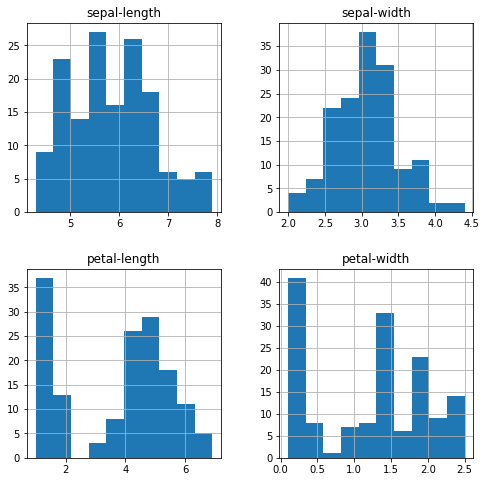

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

<Figure size 1080x720 with 0 Axes>

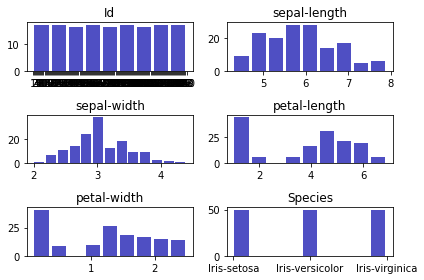

In [ ]:
plt.figure(figsize=[15,10])
f,a = plt.subplots(3,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(dataset.iloc[:,idx], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(dataset.columns[idx])
plt.tight_layout()

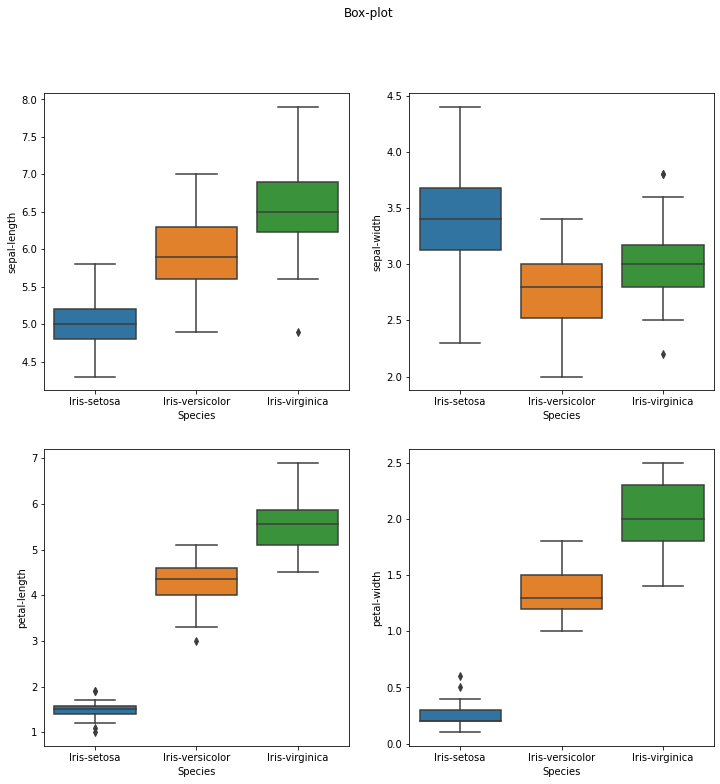

In [ ]:
plt.figure(figsize=(12,12))
plt.suptitle("Box-plot")

plt.subplot(221)
sns.boxplot(x = 'Species', y = 'sepal-length', data = dataset)

plt.subplot(222)
sns.boxplot(x = 'Species', y = 'sepal-width', data = dataset)

plt.subplot(223)
sns.boxplot(x = 'Species', y = 'petal-length', data = dataset)

plt.subplot(224)
sns.boxplot(x = 'Species', y = 'petal-width', data = dataset)

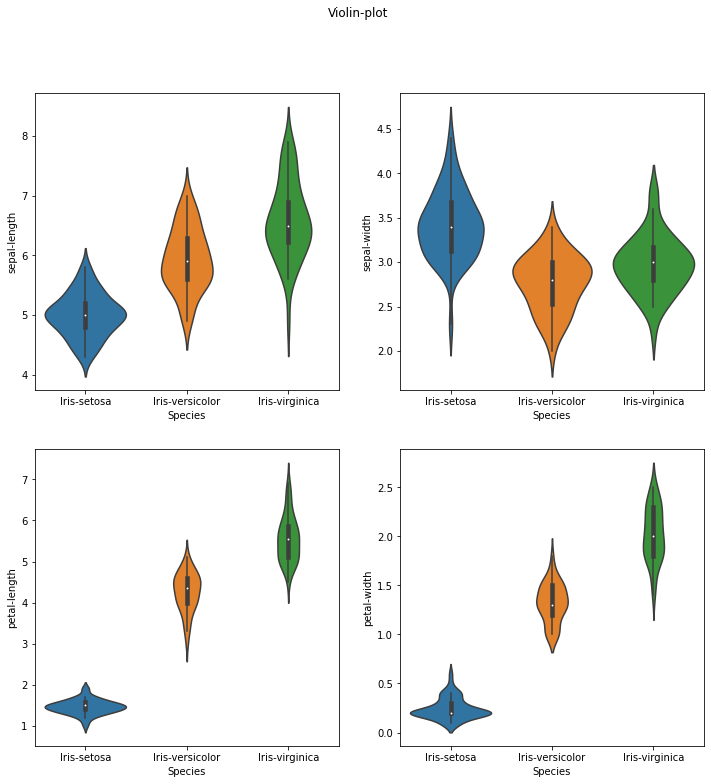

In [ ]:
plt.figure(figsize=(12,12))
plt.suptitle("Violin-plot")

plt.subplot(221)
sns.violinplot(x = 'Species', y = 'sepal-length', data = dataset)

plt.subplot(222)
sns.violinplot(x = 'Species', y = 'sepal-width', data = dataset)

plt.subplot(223)
sns.violinplot(x = 'Species', y = 'petal-length', data = dataset)

plt.subplot(224)
sns.violinplot(x = 'Species', y = 'petal-width', data = dataset)

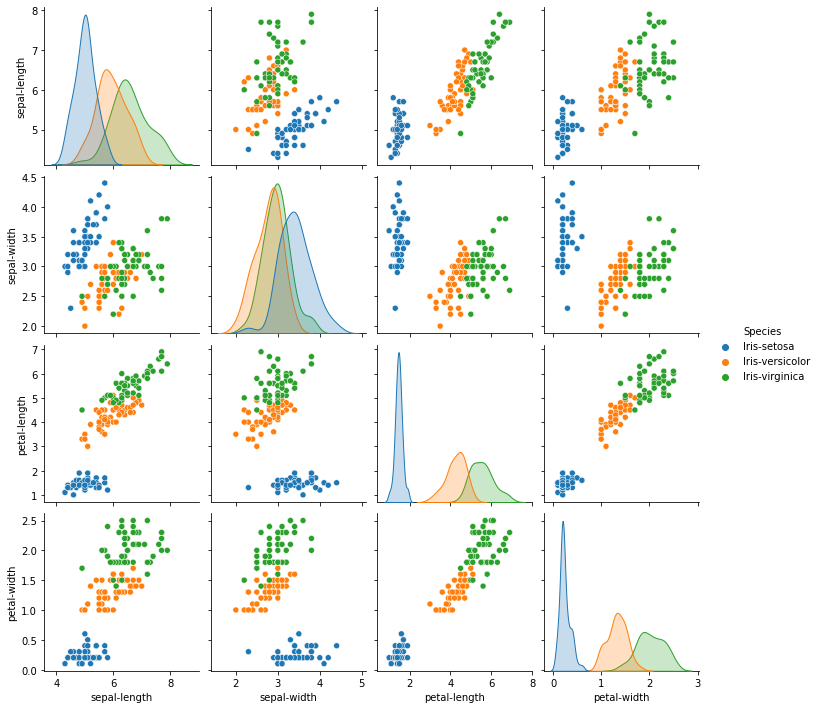

In [ ]:
sns.pairplot(data = dataset.drop(columns='Id'), hue = 'Species', diag_kind = 'kde')

In [ ]:
X = dataset.drop(columns=['Id','Species']).values
no_clusters = [1,2,3,4,5,6,7,8,9,10]
inertia = np.zeros((10,))
for i in no_clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  inertia[i-1] = kmeans.inertia_

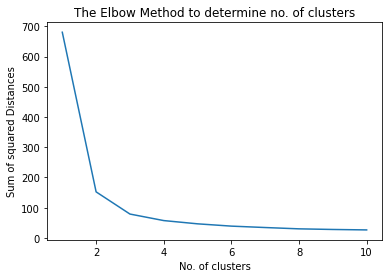

In [ ]:
plt.figure()
plt.plot(no_clusters,inertia)
plt.title("The Elbow Method to determine no. of clusters")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of squared Distances")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
Y_pred = kmeans.labels_

In [ ]:
dataset.loc[dataset['Species']=='Iris-setosa', 'Slabel'] = 1
dataset.loc[dataset['Species']=='Iris-versicolor', 'Slabel'] = 0
dataset.loc[dataset['Species']=='Iris-virginica', 'Slabel'] = 2
dataset['Pred'] = Y_pred

In [ ]:
dataset.head()

,Id,sepal-length,sepal-width,petal-length,petal-width,Species,Slabel,Pred
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,1


In [ ]:
dataset.tail()

,Id,sepal-length,sepal-width,petal-length,petal-width,Species,Slabel,Pred
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2.0,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2.0,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2.0,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.0,0
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2.0,2


<Figure size 432x288 with 0 Axes>

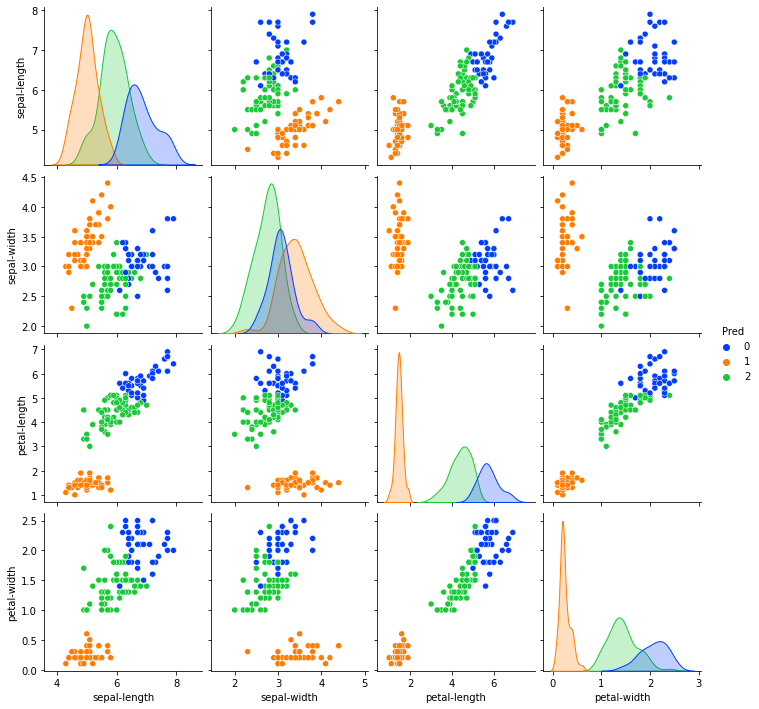

In [ ]:
plt.figure()
sns.color_palette(palette='bright')
sns.pairplot(data = dataset.drop(columns=['Id','Species','Slabel']), hue = 'Pred', diag_kind = 'kde' ,palette = 'bright')
plt.show()

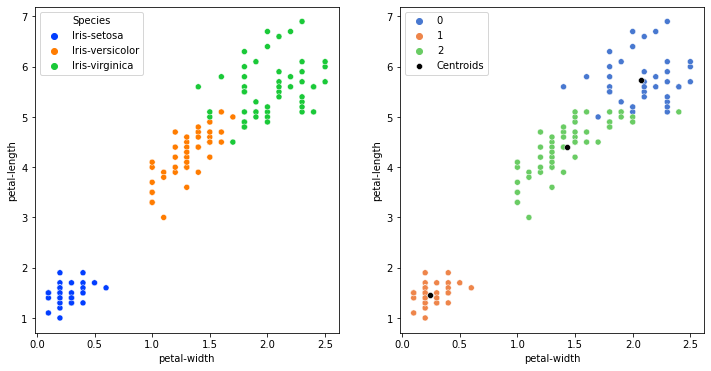

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x = 'petal-width', y = "petal-length", hue = 'Species', data = dataset, palette = 'bright')

plt.subplot(122)
sns.scatterplot(x = 'petal-width', y = "petal-length", hue = 'Pred', data = dataset, palette = 'muted')
sns.scatterplot(x = kmeans.cluster_centers_[:,3], y = kmeans.cluster_centers_[:,2], markers = '*', color = 'black', label = 'Centroids')

In [ ]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
print("Accuracy = ", round(sum(dataset['Pred'] == dataset['Slabel'])/150, 2))

Accuracy =  0.44


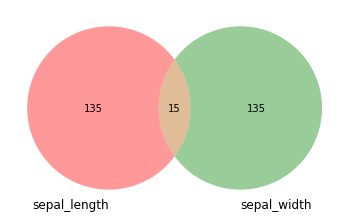

In [ ]:
from matplotlib_venn import venn2
sepal_length = dataset.iloc[:,0] 
sepal_width = dataset.iloc[:,1]  
#petal_length = dataset.iloc[:,2]
#petal_width = dataset.iloc[:,3]
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ("sepal_length", "sepal_width"))
plt.show()

2. Use diabetes dataset and perform the following: 

a) Implement Pre-processing functions 

- check for NULL values in the dataset. If any NULL value is present then treat it  accordingly. 

- extract only feature columns from the dataset. 

b) Determine the number of clusters using Elbow method.

c) Apply k-means clustering using the value of k determined in step (b). d) Form the clusters. 

e) Evaluate the quality of clusters formed by k-means


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df=pd.read_csv("pima-indians-diabetes.csv",sep=",",names = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


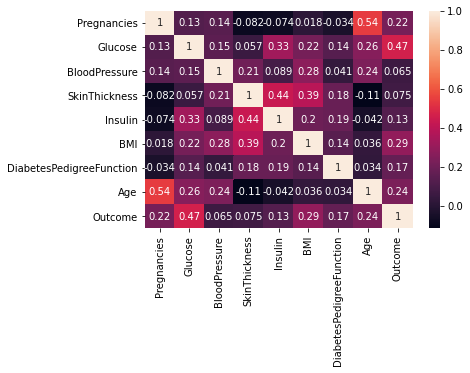

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data=df.drop("Outcome",axis=1)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


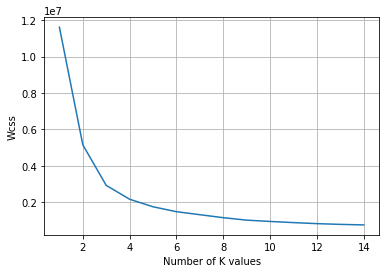

In [ ]:
wcss=[]
for K in range(1,15):
    
    Kmeans = KMeans(n_clusters=K)
    Kmeans.fit(data)
    wcss.append(Kmeans.inertia_) # inertia_ calculates wcss.
    
plt.plot(range(1,15),wcss)
plt.xlabel("Number of K values")
plt.ylabel("Wcss")
plt.grid()

In [ ]:
n_Kmeans = KMeans(n_clusters = 2)
clusters = n_Kmeans.fit_predict(data)
df["Kmeans_Label"]= clusters

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Kmeans_Label
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
df.shape

(768, 10)

In [ ]:
accuracy=[]

for i in range(df.shape[0]):
    if df.Outcome[i]==df.Kmeans_Label[i]:
        accuracy.append(df.Kmeans_Label[i])
        

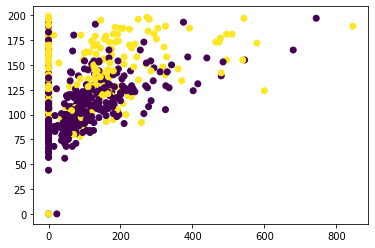

In [ ]:
plt.scatter(x="Insulin",y="Glucose",data=df,c="Outcome")

In [ ]:
df.Outcome.unique()

array([1, 0])

In [ ]:
df.Kmeans_Label.unique() 

array([0, 1], dtype=int32)

Text(0, 0.5, 'Glucose')

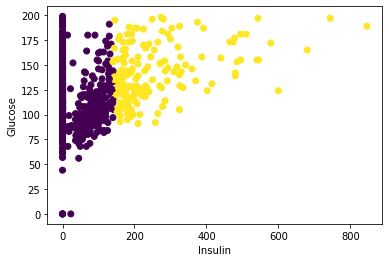

In [ ]:
plt.scatter(x="Insulin",y="Glucose",data=df,c="Kmeans_Label") # 
plt.xlabel("Insulin")
plt.ylabel("Glucose")

In [ ]:
len(accuracy)

507

In [ ]:
print("Accuracy:",len(accuracy)/df.shape[0])

Accuracy: 0.66015625


3. Use balance dataset and perform the following: 

a) Implement Pre-processing functions 

- Check for NULL values in the dataset. If any NULL value is present then treat it  accordingly. 

- extract only feature columns from the dataset. 

b) Determine the number of clusters using dendogram. Use single linkage method. 

c) Apply agglomerative clustering using single linkage method. 

d) Form the clusters. 

e) Evaluate the quality of clusters formed by agglomerative clustering.


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving balance.csv to balance.csv


In [ ]:
balance_df = pd.read_csv('balance.csv')

In [ ]:
balance_df.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [ ]:
balance_df.shape

(624, 5)

In [ ]:
balance_df.isnull().sum()

B      0
1      0
1.1    0
1.2    0
1.3    0
dtype: int64

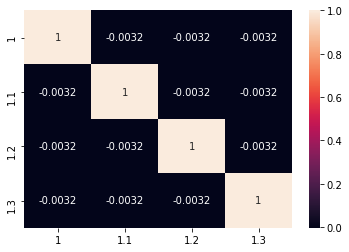

In [ ]:
sns.heatmap(balance_df.corr(),annot=True)

In [ ]:
print(balance_df.shape)

balance_df.head() 

data = balance_df.iloc[:, 1:4].values 


(624, 5)


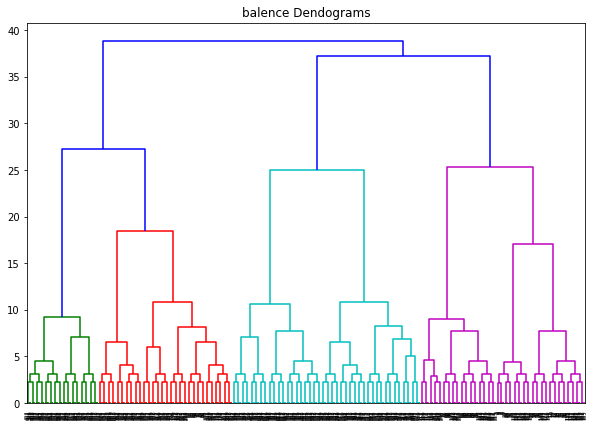

In [ ]:
#drawing dendogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("balence Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

In [ ]:
#clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
d=cluster.fit_predict(data) 
print(d) 


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 

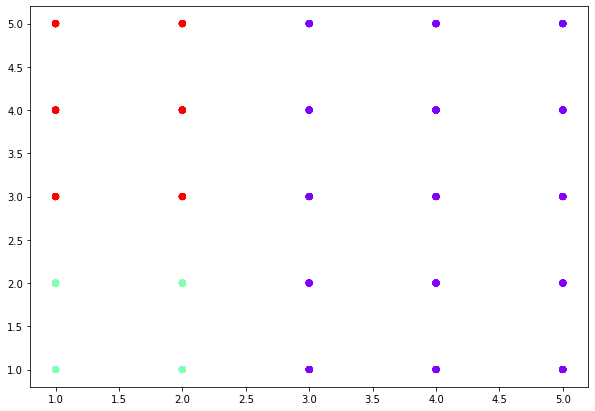

In [ ]:
#Plotting 
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,d)
print("For n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.23574592512191936


4. Use balance dataset and perform the following: 

a) Implement Pre-processing functions 

- Check for NULL values in the dataset. If any NULL value is present then treat 
it  accordingly. 

- extract only feature columns from the dataset. 

b) Determine the number of clusters using dendogram. Use complete linkage method. 

c) Apply agglomerative clustering using complete linkage method. d) Form the clusters. 

e) Evaluate the quality of clusters formed by agglomerative clustering and compare the  results with the clusters obtained in Q3.


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving balance.csv to balance.csv


In [ ]:
balance_df1 = pd.read_csv('balance.csv')

In [ ]:
balance_df1.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [ ]:
balance_df1.shape

(624, 5)

In [ ]:
balance_df1.isnull().sum()

B      0
1      0
1.1    0
1.2    0
1.3    0
dtype: int64

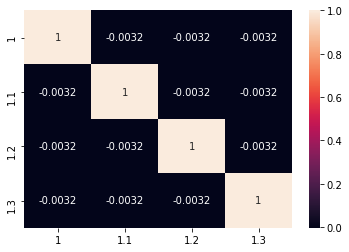

In [ ]:
sns.heatmap(balance_df1.corr(),annot=True)

In [ ]:
x = balance_df1.iloc[:,1:5].values
x

array([[1, 1, 1, 2],
       [1, 1, 1, 3],
       [1, 1, 1, 4],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]])

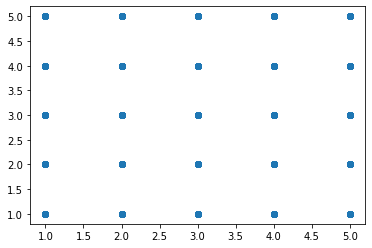

In [ ]:
plt.scatter(x[:,0],x[:,1], label='True Position')

plt.show() 

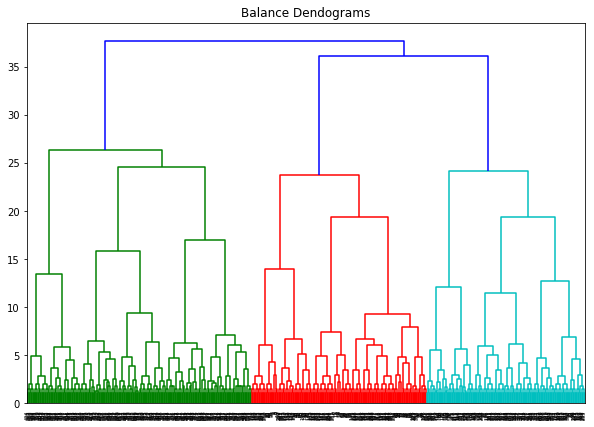

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Balance Dendograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))   

[1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1
 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 1 1 0 0 1 1 1 0 0 0 1 

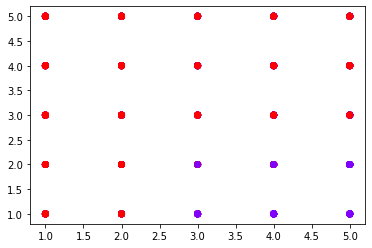

In [ ]:
#Now clustering the data points
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster_labels=cluster.fit_predict(x)  
print(cluster.labels_) 
print(cluster_labels) 

plt.scatter(x[:,0],x[:,1], c=cluster_labels, cmap='rainbow')  
#plt.scatter(X[:,1],X[:,0], c=cluster.labels_, cmap='rainbow')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, cluster_labels)
print("For n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.13552865783329954


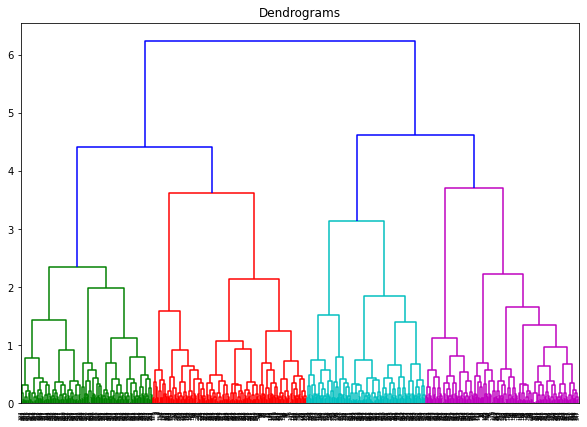

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))